In [40]:
!pip install matplotlib
%matplotlib inline
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
url ="/Users/harikasatti/Desktop/Github/Project1/SALES.txt"
df = pd.read_csv(url, delim_whitespace=True, header=None)



/var/folders/m_/5cq8b5052cdd_b4gdvl60qn40000gn/T/ipykernel_10438/1008208599.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None)


In [42]:
#EDA
print(df.shape)
df.head()

(36, 2)


,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [43]:
df.columns = ['Sales', 'Advertising']


In [44]:
df.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


In [46]:
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [47]:
x = df['Advertising'].values
y = df['Sales'].values

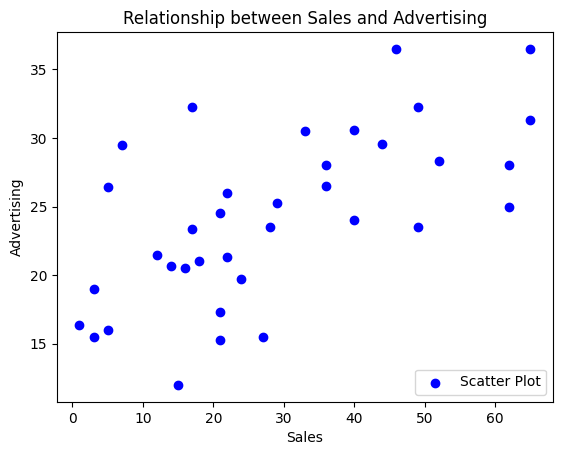

In [51]:
plt.scatter(x, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)

In [52]:
print(x.shape)
print(y.shape)

(36,)
(36,)


In [53]:
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [54]:
X.shape, y.shape

((36, 1), (36, 1))

In [55]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 62.9 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 77.6 MB/s eta 0:00:00:00:0100:01
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


In [58]:
# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

In [59]:
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 

Estimated model slope, a: [[0.17826496]]
Estimated model intercept, b: (array([18.81293435]),)


In [60]:
lm.predict(X)[0:10]

array([[21.48690878],
       [21.66517374],
       [22.02170366],
       [23.62608832],
       [22.55649855],
       [27.54791748],
       [22.55649855],
       [22.73476351],
       [23.80435328],
       [25.23047298]])

In [61]:
!pip install numpy
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 3.5083


In [62]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.5907


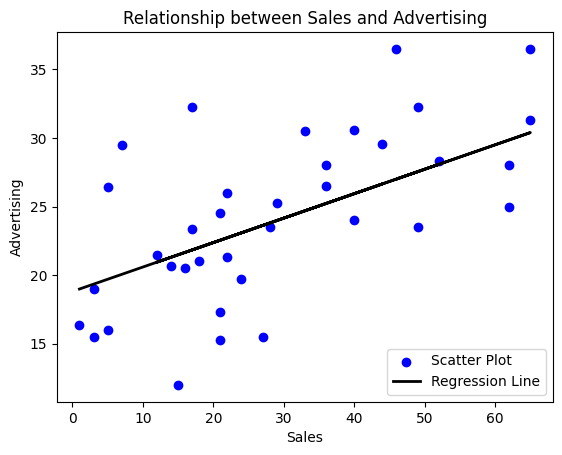

In [64]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=2, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

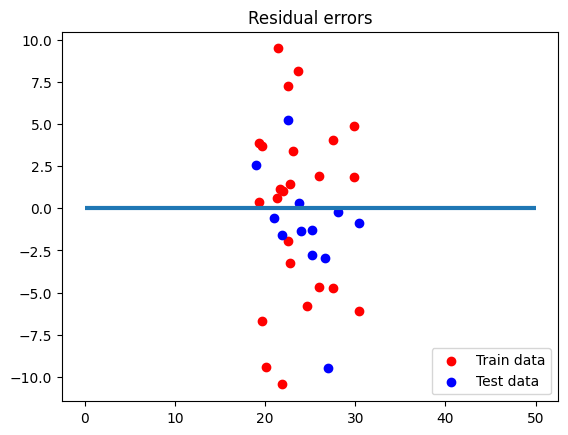

In [65]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [66]:
print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.2861
Test set score: 0.5907


In [67]:
from joblib import dump
dump(lm, 'model_filename.pkl')


['model_filename.pkl']